<a href="https://colab.research.google.com/github/Ayush-Sharma23/demonstration/blob/main/Final_Prac_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-datasets scikit-learn numpy seaborn matplotlib pillow

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [3]:
IMG_SIZE = (160,160)
BATCH_SIZE = 32

(train_ds, val_ds), info = tfds.load(
    'tf_flowers',
    split=['train[:85%]', 'train[85%:]'],
    with_info=True,
    as_supervised=True
)

def preprocess(img, label):
    img = tf.image.resize(img, IMG_SIZE) / 255.0
    return img, label

train_ds = train_ds.map(preprocess).batch(BATCH_SIZE).prefetch(1)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(1)
class_names = info.features['label'].names

#Get one batch
images, labels = next(iter(train_ds))
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("Class Names:", class_names)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.ZAK2RH_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Images shape: (32, 160, 160, 3)
Labels shape: (32,)
Class Names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [4]:
base = tf.keras.applications.MobileNetV2(
    input_shape=(*IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base.trainable = False

model = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(train_ds, validation_data=val_ds, epochs=3, verbose=1)

base.summary()
model.summary()

base.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(train_ds, validation_data=val_ds, epochs=3, verbose=1)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.6174 - loss: 1.0331 - val_accuracy: 0.8564 - val_loss: 0.4341
Epoch 2/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 761ms/step - accuracy: 0.8733 - loss: 0.3818 - val_accuracy: 0.8873 - val_loss: 0.3598
Epoch 3/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 91s 858ms/step - accuracy: 0.9023 - loss: 0.2975 - val_accuracy: 0.8873 - val_loss: 0.3329


Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,277,201 (8.69 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 12,812 (50.05 KB)

Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.7830 - loss: 0.5945 - val_accuracy: 0.8909 - val_loss: 0.3086
Epoch 2/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 400s 4s/step - accuracy: 0.9160 - loss: 0.2931 - val_accuracy: 0.8945 - val_loss: 0.2912
Epoch 3/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - accuracy: 0.9592 - loss: 0.1976 - val_accuracy: 0.9018 - val_loss: 0.2807


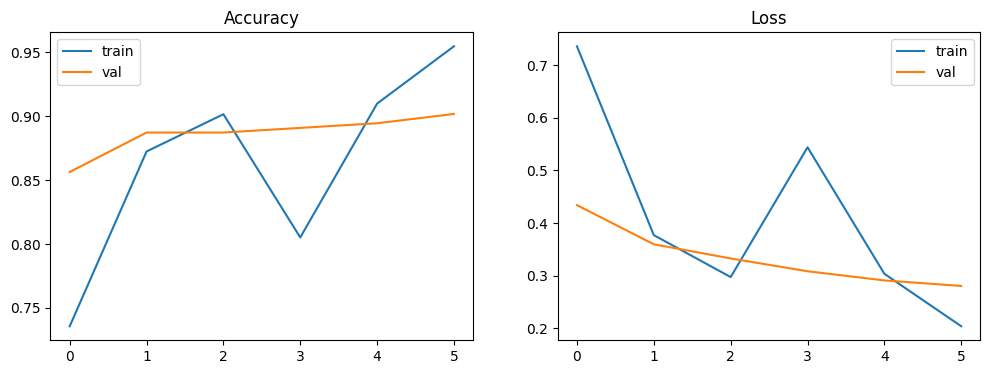

Validation Accuracy:  0.9018181562423706


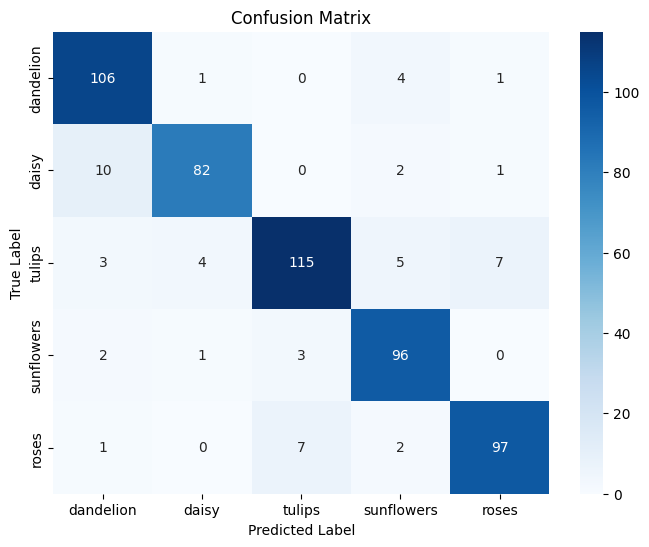

              precision    recall  f1-score   support

   dandelion       0.87      0.95      0.91       112
       daisy       0.93      0.86      0.90        95
      tulips       0.92      0.86      0.89       134
  sunflowers       0.88      0.94      0.91       102
       roses       0.92      0.91      0.91       107

    accuracy                           0.90       550
   macro avg       0.90      0.90      0.90       550
weighted avg       0.90      0.90      0.90       550



In [5]:
train_acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
train_loss = history1.history['loss'] + history2.history['loss']
val_loss = history1.history['val_loss'] + history2.history['val_loss']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.title('Accuracy');
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.title('Loss');
plt.legend()
plt.show();

loss, acc = model.evaluate(val_ds, verbose=0)
print('Validation Accuracy: ',acc)

y_true, y_pred = [], []
for x, y in val_ds:
    y_true.extend(y.numpy())
    y_pred.extend(np.argmax(model.predict(x, verbose=0), axis = 1))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix'); plt.ylabel('True Label'); plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

In [9]:
test_folders = Path('/content/extracted_data/Practical 2/Test_Dataset_Only')
img_types = ("*.jpg", "*.jpeg", "*.png", "*.webp")

def predict(img_path):
    img = Image.open(img_path).convert('RGB').resize(IMG_SIZE)
    arr = np.array(img)[np.newaxis] / 255.0
    pred = model.predict(arr, verbose=0)[0]
    cls = class_names[np.argmax(pred)]
    conf = np.max(pred)
    print(f"{img_path.name} -> {cls} ({conf:.3f})")

if test_folders.exists():
    for pattern in img_types:
        for img_path in test_folders.glob(pattern):
            predict(img_path)
else:
    print("Test folder not found.")

Rose.webp -> roses (0.678)
Tulip.webp -> tulips (0.990)
Daisy.webp -> daisy (0.999)
Dandelion.webp -> dandelion (0.971)
Sunflower.webp -> sunflowers (0.979)
